<center>
<img src="logo.png" height="900"> 
</center>


#  Несмещённость и охота на мамонтов

Когда статистик оценивает какой-нибудь параметр, он хочет: 

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую нормальность__ оценки.

В этой тетрадке поговорим про несмещённость. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

__Определение:__  Оценка $\hat{\theta}$ параметра $\theta$ называется __несмещённой,__ если $\mathbb{E} (\hat{\theta}) = \theta$.

## Несмещённые мамонтоборцы 

В долине летучей мыши Шикака живёт племя Вачати. Оно охотится на мамонтов. Древний Бог Оньянкопонга не так давно сгенерировал в долине реки из нормального распределения $10$ тысяч мамонтов со средним весом $300$ кг и стандартным отклонением $100$ кг. 

In [2]:
norm_rv = stats.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**4)

np.mean(x_mamont) # настоящее среднее

299.1862327741454

* Шаман Одэхингум (лёгкое колебание воды) уверен в своём взоре: 

$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

* Шаман Пэпина (виноградная лоза, растущая вокруг дуба) не любит, когда его избивают за слишком оптимистичные прогнозы:

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

* Шаман Апониви (где ветер вырывает промежуток с корнем) тоже коректирует прогноз:

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

In [3]:
# Команда нам не подходит, так как она всю матрицу сделает без повторений
# np.random.choice(x_mamont, size=(n,m), replace=False)

n = 100

th_od = np.zeros(200)
th_pe = np.zeros(200)
th_ap = np.zeros(200)

for i in range(200):
    x_sample = np.random.choice(x_mamont, size=n, replace=False)
    x_mean = np.mean(x_sample)
    th_od[i] = x_mean
    th_pe[i] = x_mean - 4200/n
    th_ap[i] = x_mean - 5*(n+1)/n  


In [4]:
# посмотрим на оценки E(\hat \theta)
np.mean(th_od), np.mean(th_pe), np.mean(th_ap)

(299.1963134839845, 257.1963134839845, 294.1463134839845)

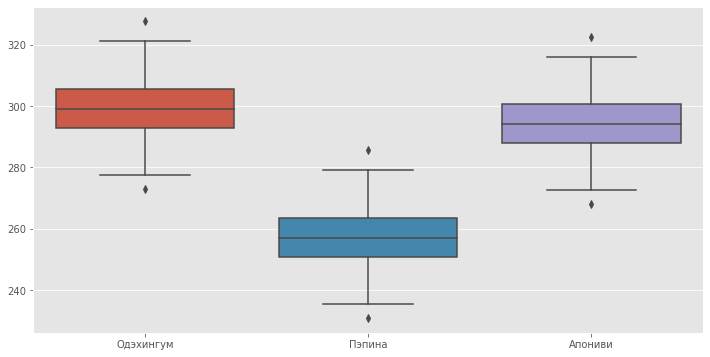

In [5]:
plt.figure(figsize=(12,6))

df = pd.DataFrame(zip(th_od, th_pe, th_ap), columns = ['Одэхингум', 'Пэпина', 'Апониви'])
sns.boxplot(data = df,);

Давайте попробуем посмотреть, как ведут себя распределения оценок шаманов в динамике, при росте числа наблюдений.


<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_boxplot.gif" width="400"> 
</center>


Напоминание про ящик с усами: 

<center>
<img src="./Densityvsbox.png" width="500"> 
</center>

Хех. Шаманы. Детский сад. Подавай нам что-нибудь из бизнеса. Окей, договорились. Давайте предположим, что шаманы прогнозируют не вес мамонта, а то на какую сумму в среднем будут наступать страховые случаи. Ясное дело, что наш  бюджет на статистические исследования довольно сильно ограничен. И ежедневно мы можем собирать информацию только от ограниченного числа респондентов. Если мы стабильно будем на основе этой информации получать смещённую оценку страхового покрытия, то вместо получения прибыли в среднем, мы легко можем оказаться банкротами. 

__Ещё раз, ещё раз:__ несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 